In [18]:
#percentage of stadium filled 
#By team, weekday, weather (possibly look to bucket weather- rainy, cold, hot, etc.)
#week/ point in the season
#cityPopulation and attendance. Determining which is more influential
#prevYearwins

#interaction variables and how to evaluate them 

#Store residuals and use as the response variable. See which variables contribute most to this error


# Questions
#Categorical - how to convert (one hot, mean, etc.) and how important these choices are
 # One hot encoding (30 variables, 29 0's and 1 1)
#Numeric - Normalization, etc.
#Interaction effects
    #Multiply variables by each other 
    #Sunny (0/1) and weekend (0/1). will be 1 if both




In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('glogs_final.csv')
data = pd.DataFrame(data)

In [2]:
data['propFilled'] = data['attendance'] / data['capacity'] #added to be a possible response variable

In [3]:
data['weekend'] = np.where(data['day_of_week'].isin(['Fri','Sat','Sun']),1,0) #initial EDA shows small differences M-Thur and F-Sun
mean_attendance = data.groupby('weekend')['attendance'].mean()
mean_attendance

weekend
0    28229.696646
1    33852.574532
Name: attendance, dtype: float64

In [4]:
data = pd.get_dummies(data, columns=['h_name','v_name'], dtype=int) #One hot encoding for home and visitor teams

In [5]:
data = data[~data['year'].isin([2014, 2015, 2016])] #excludes data from 2014-2016 as this will be used at the very end

In [6]:
model_dat = data.drop(columns = ['date','year','day_of_week', 'park_id','propFilled'])

In [7]:
#there are 3640 rows in model_dat without temperature or precipitation data
model_dat_final = model_dat.dropna()

In [8]:
#Implementing MLR Model
from sklearn.model_selection import train_test_split
X = model_dat_final.drop(columns=['attendance'])  
y = model_dat_final['attendance'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [9]:
model_dat.columns

Index(['week', 'day_night', 'temp', 'precip', 'capacity', 'prev_year_wins',
       'made_playoffs', 'won_division', 'InstagramFollowers', 'CityPopulation',
       'attendance', 'weekend', 'h_name_ARI', 'h_name_ATL', 'h_name_BAL',
       'h_name_BOS', 'h_name_CHC', 'h_name_CHW', 'h_name_CIN', 'h_name_CLE',
       'h_name_COL', 'h_name_DET', 'h_name_HOU', 'h_name_KC', 'h_name_LAA',
       'h_name_LAD', 'h_name_MIA', 'h_name_MIL', 'h_name_MIN', 'h_name_NYM',
       'h_name_NYY', 'h_name_OAK', 'h_name_PHI', 'h_name_PIT', 'h_name_SD',
       'h_name_SEA', 'h_name_SF', 'h_name_STL', 'h_name_TB', 'h_name_TEX',
       'h_name_TOR', 'h_name_WSH', 'v_name_ARI', 'v_name_ATL', 'v_name_BAL',
       'v_name_BOS', 'v_name_CHC', 'v_name_CHW', 'v_name_CIN', 'v_name_CLE',
       'v_name_COL', 'v_name_DET', 'v_name_HOU', 'v_name_KC', 'v_name_LAA',
       'v_name_LAD', 'v_name_MIA', 'v_name_MIL', 'v_name_MIN', 'v_name_NYM',
       'v_name_NYY', 'v_name_OAK', 'v_name_PHI', 'v_name_PIT', 'v_name_SD',
      

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

attendance_predictions = model.predict(X_test)

In [11]:
result = pd.DataFrame({'Predicted': attendance_predictions, 'Actual': y_test})
result['Residual'] = abs(result['Predicted'] - result['Actual'])

In [12]:
result['Residual'].describe()

count     3628.000000
mean      4932.314440
std       3765.452887
min          0.713442
25%       1933.872517
50%       4157.021762
75%       7090.338499
max      24776.097549
Name: Residual, dtype: float64

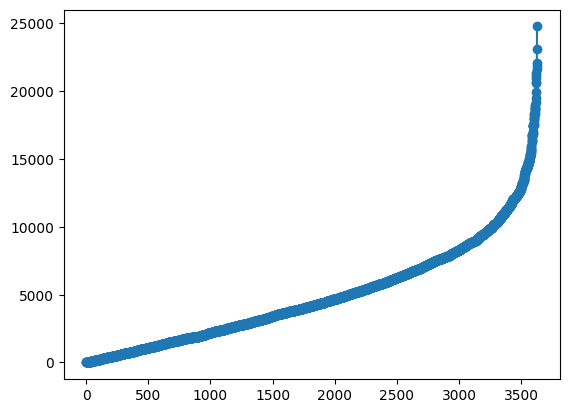

In [13]:
import matplotlib.pyplot as plt

sorted_residuals = result['Residual'].sort_values().reset_index(drop=True)
# Plot
plt.plot(sorted_residuals, marker='o', linestyle='-')


In [14]:
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y_test, attendance_predictions)
r2 = r2_score(y_test, attendance_predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 38502453.06
R² Score: 0.67


In [15]:
len(model.coef_)

71

In [16]:
terms = [f"{coef:.2f} * {feature}" for coef, feature in zip(model.coef_, X.columns)]
equation = " + ".join(terms)
equation = f"y = {model.intercept_:.2f} + {equation}"

# Print the equation
print(equation)

y = -29731.61 + 22.96 * week + -146.18 * day_night + 83.39 * temp + -799.96 * precip + 0.44 * capacity + 187.10 * prev_year_wins + 1287.36 * made_playoffs + 447.50 * won_division + 0.01 * InstagramFollowers + 0.00 * CityPopulation + 5309.35 * weekend + 0.00 * h_name_ARI + -6917.21 * h_name_ATL + 3959.31 * h_name_BAL + 4531.48 * h_name_BOS + 2107.22 * h_name_CHC + -1436.72 * h_name_CHW + 5498.60 * h_name_CIN + 3687.53 * h_name_CLE + 7999.80 * h_name_COL + 9241.02 * h_name_DET + -2818.68 * h_name_HOU + 3130.88 * h_name_KC + -2078.90 * h_name_LAA + -21315.82 * h_name_LAD + -8701.32 * h_name_MIA + 0.00 * h_name_MIL + -0.00 * h_name_MIN + -16678.80 * h_name_NYM + -23750.34 * h_name_NYY + -1079.17 * h_name_OAK + 7808.33 * h_name_PHI + 5876.23 * h_name_PIT + 3756.74 * h_name_SD + 3380.46 * h_name_SEA + 10718.83 * h_name_SF + 14029.27 * h_name_STL + -0.00 * h_name_TB + -2771.29 * h_name_TEX + 0.00 * h_name_TOR + 1822.55 * h_name_WSH + -1326.05 * v_name_ARI + -320.23 * v_name_ATL + -1048.22 * v

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #scale data for uniform comparison


model = LinearRegression()
model.fit(X_scaled, y)


feature_importance = abs(model.coef_) #coefficients from model on scaled data
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
9,CityPopulation,6.709672e+03
8,InstagramFollowers,6.107678e+03
29,h_name_NYY,4.808070e+03
24,h_name_LAD,4.554442e+03
28,h_name_NYM,3.088193e+03
...,...,...
11,h_name_ARI,1.136868e-11
26,h_name_MIL,5.456968e-12
27,h_name_MIN,4.035883e-12
39,h_name_TOR,6.821210e-13
